In [1]:
from itertools import cycle
import numpy as np
import random
from sklearn import naive_bayes
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter
import pylab as pl

In [2]:
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)
    pl.legend()
    pl.show()

# Dataset Iris
We'll be using different supervised learning algorithms on this dataset and evalute their performances. It contains the caracteristics of 3 types of iris flowers and we want to build a model that classifies new entries.

In [3]:
irisData = datasets.load_iris()
print(irisData.data)
print(irisData.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(irisData.target_names)
print(irisData.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
occur = Counter(irisData.target)
for i in [0, 1, 2]:
    print("Number of occurences of " + irisData.target_names[i] + " is " + str(occur.get(i)))

Number of occurences of setosa is 50
Number of occurences of versicolor is 50
Number of occurences of virginica is 50


In [6]:
print("32th element of dataset:")
for i in range(0, len(irisData.feature_names)):
    print(irisData.feature_names[i] + ": " + str(irisData.data[31][i]))
print("Class: " + irisData.target_names[irisData.target[31]])

32th element of dataset:
sepal length (cm): 5.4
sepal width (cm): 3.4
petal length (cm): 1.5
petal width (cm): 0.4
Class: setosa


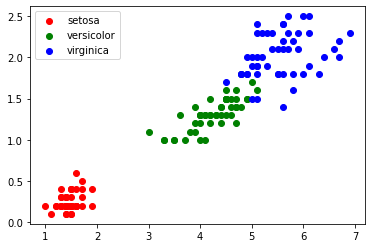

In [7]:
plot_2D(irisData.data, irisData.target, irisData.target_names)

# Naïve Bayes algorithm

In [8]:
nb = naive_bayes.MultinomialNB(fit_prior=True) 
nb.fit(irisData.data[:-1], irisData.target[:-1])
#predicting some values
p31 = nb.predict([irisData.data[31]])
print(p31)
plast = nb.predict([irisData.data[-1]])
print(plast)
p = nb.predict(irisData.data[:])
print(p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Training without split

In [9]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
irisData = datasets.load_iris()
nb.fit(irisData.data[:], irisData.target[:])
predictions = nb.predict(irisData.data[:])
erreur = 0
print("Errors:")
for i in range(len(irisData.target)):
    if (predictions[i] != irisData.target[i]):
        erreur = erreur + 1
print("Method 1: " + str(erreur / len(irisData.data)))

# method 2 with P-Y
print("Method 2: " + str(np.count_nonzero(predictions - irisData.target) / len(irisData.data)))

# method 3 with .score()
print("Method 3: " + str(1 - nb.score(irisData.data, irisData.target)))

Errors:
Method 1: 0.04666666666666667
Method 2: 0.04666666666666667
Method 3: 0.046666666666666634


### Training with split

In [10]:
def split(S):
    cdata=list(zip(S.data,S.target))
    random.shuffle(cdata)
    dataS,targetS=zip(*cdata)
    dataS1=list(dataS[:100])
    dataS2=list(dataS[100:])
    targetS1=list(targetS[:100])
    targetS2=list(targetS[100:])
    return [dataS1, targetS1, dataS2, targetS2]

In [11]:
def training_split(S, clf):
    dt=split(S)
    clf.fit(dt[0][:], dt[1][:])
    predictions = clf.predict(dt[2][:])
    return np.count_nonzero(predictions - dt[3]) / len(dt[2])*100

print("Error with split:")
print(training_split(irisData,nb))

Error with split:
28.000000000000004


In [12]:
print("Average Error for:")
for t in [10, 50, 100, 200, 500, 1000]:
    for j in range(0, 20):
        moyenne = 0
        for i in range(0, t):
            moyenne += training_split(irisData, nb)
        moyenne /= t
        print("t = " + str(t) + ", repetition " + str(j + 1) + " : " + str(moyenne) + "%")

Average Error for:
t = 10, repetition 1 : 19.2%
t = 10, repetition 2 : 24.2%
t = 10, repetition 3 : 19.2%
t = 10, repetition 4 : 15.6%
t = 10, repetition 5 : 20.0%
t = 10, repetition 6 : 19.0%
t = 10, repetition 7 : 20.0%
t = 10, repetition 8 : 17.2%
t = 10, repetition 9 : 25.2%
t = 10, repetition 10 : 18.2%
t = 10, repetition 11 : 21.4%
t = 10, repetition 12 : 22.8%
t = 10, repetition 13 : 14.8%
t = 10, repetition 14 : 24.8%
t = 10, repetition 15 : 9.8%
t = 10, repetition 16 : 16.0%
t = 10, repetition 17 : 18.2%
t = 10, repetition 18 : 27.4%
t = 10, repetition 19 : 28.0%
t = 10, repetition 20 : 17.2%
t = 50, repetition 1 : 21.04%
t = 50, repetition 2 : 19.44%
t = 50, repetition 3 : 19.28%
t = 50, repetition 4 : 20.88%
t = 50, repetition 5 : 19.08%
t = 50, repetition 6 : 20.76%
t = 50, repetition 7 : 20.72%
t = 50, repetition 8 : 23.64%
t = 50, repetition 9 : 22.92%
t = 50, repetition 10 : 18.4%
t = 50, repetition 11 : 15.64%
t = 50, repetition 12 : 16.2%
t = 50, repetition 13 : 22.4%


In [13]:
for size in [0.1,0.25,0.33,0.5]:
    for i in range(0,1000):
        dataS1,dataS2,targetS1,targetS2=train_test_split(irisData.data,irisData.target,test_size=size,shuffle=True)
        nb.fit(dataS1[:],targetS1[:])
        predictions = nb.predict(dataS2[:])
        print("test_size = " + str(size) + ", repetition " +str(i+1)+" : "+ str(np.count_nonzero(predictions - targetS2) / len(dataS2)*100)+"%")


test_size = 0.1, repetition 1 : 6.666666666666667%
test_size = 0.1, repetition 2 : 33.33333333333333%
test_size = 0.1, repetition 3 : 40.0%
test_size = 0.1, repetition 4 : 6.666666666666667%
test_size = 0.1, repetition 5 : 13.333333333333334%
test_size = 0.1, repetition 6 : 0.0%
test_size = 0.1, repetition 7 : 20.0%
test_size = 0.1, repetition 8 : 0.0%
test_size = 0.1, repetition 9 : 6.666666666666667%
test_size = 0.1, repetition 10 : 0.0%
test_size = 0.1, repetition 11 : 20.0%
test_size = 0.1, repetition 12 : 26.666666666666668%
test_size = 0.1, repetition 13 : 40.0%
test_size = 0.1, repetition 14 : 20.0%
test_size = 0.1, repetition 15 : 6.666666666666667%
test_size = 0.1, repetition 16 : 33.33333333333333%
test_size = 0.1, repetition 17 : 0.0%
test_size = 0.1, repetition 18 : 0.0%
test_size = 0.1, repetition 19 : 13.333333333333334%
test_size = 0.1, repetition 20 : 6.666666666666667%
test_size = 0.1, repetition 21 : 0.0%
test_size = 0.1, repetition 22 : 20.0%
test_size = 0.1, repetit

### Cross Validation

In [14]:
nb.fit(irisData.data[:], irisData.target[:])
predictions = nb.predict(irisData.data[:])
for fold in [2, 3, 5, 8, 10]:
    cross =1 - cross_val_score(nb, irisData.data, irisData.target, cv=fold)
    print("Cross Validation with " + str(fold) + " folds:")
    print(cross)
    print("average: " + str(cross.mean()))
    print()



Cross Validation with 2 folds:
[0.04       0.05333333]
average: 0.04666666666666669

Cross Validation with 3 folds:
[0.04 0.08 0.04]
average: 0.053333333333333344

Cross Validation with 5 folds:
[0.         0.03333333 0.1        0.1        0.        ]
average: 0.046666666666666655

Cross Validation with 8 folds:
[0.         0.         0.05263158 0.10526316 0.10526316 0.15789474
 0.         0.        ]
average: 0.05263157894736843

Cross Validation with 10 folds:
[0.         0.         0.         0.06666667 0.13333333 0.06666667
 0.2        0.         0.         0.        ]
average: 0.046666666666666655



# Decision Tree

In [15]:
dt = DecisionTreeClassifier()
dt.fit(irisData.data[:], irisData.target[:])
predictions = dt.predict(irisData.data[:])

print("Average Error for:")
for t in [10, 50, 100, 200, 500, 1000]:
    for j in range(0, 20):
        moyenne = 0
        for i in range(0, t):
            moyenne += training_split(irisData, dt)
        moyenne /= t
        print("t = " + str(t) + ", repetition " + str(j + 1) + " : " + str(moyenne) + "%")

Average Error for:
t = 10, repetition 1 : 5.8%
t = 10, repetition 2 : 6.0%
t = 10, repetition 3 : 4.2%
t = 10, repetition 4 : 5.6%
t = 10, repetition 5 : 5.4%
t = 10, repetition 6 : 6.2%
t = 10, repetition 7 : 6.2%
t = 10, repetition 8 : 6.2%
t = 10, repetition 9 : 6.0%
t = 10, repetition 10 : 6.0%
t = 10, repetition 11 : 8.2%
t = 10, repetition 12 : 6.4%
t = 10, repetition 13 : 4.0%
t = 10, repetition 14 : 4.2%
t = 10, repetition 15 : 6.4%
t = 10, repetition 16 : 6.8%
t = 10, repetition 17 : 4.8%
t = 10, repetition 18 : 4.2%
t = 10, repetition 19 : 4.6%
t = 10, repetition 20 : 5.0%
t = 50, repetition 1 : 5.8%
t = 50, repetition 2 : 5.8%
t = 50, repetition 3 : 6.0%
t = 50, repetition 4 : 5.64%
t = 50, repetition 5 : 4.84%
t = 50, repetition 6 : 5.48%
t = 50, repetition 7 : 5.64%
t = 50, repetition 8 : 5.16%
t = 50, repetition 9 : 5.48%
t = 50, repetition 10 : 5.52%
t = 50, repetition 11 : 5.6%
t = 50, repetition 12 : 6.4%
t = 50, repetition 13 : 5.52%
t = 50, repetition 14 : 5.68%
t = 